In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv('../writes/normalizedpropdata.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
import joblib

model = LogisticRegression(max_iter=2000, random_state=42, verbose=1)
model.fit(X_train, y_train)
joblib.dump(model, 'logistic_regression_model.pkl')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          192     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  2.19993D+01


 This problem is unconstrained.



At iterate   50    f=  5.69236D-01    |proj g|=  2.09393D+00

At iterate  100    f=  5.64556D-01    |proj g|=  2.24222D+00

At iterate  150    f=  5.57305D-01    |proj g|=  1.05180D+01

At iterate  200    f=  5.56684D-01    |proj g|=  9.94063D+00

At iterate  250    f=  5.54706D-01    |proj g|=  3.81646D-01

At iterate  300    f=  5.54264D-01    |proj g|=  1.16742D+01

At iterate  350    f=  5.52750D-01    |proj g|=  1.24481D-01

At iterate  400    f=  5.52227D-01    |proj g|=  4.37488D+00

At iterate  450    f=  5.51674D-01    |proj g|=  4.53609D-02

At iterate  500    f=  5.51511D-01    |proj g|=  6.21333D-01

At iterate  550    f=  5.51224D-01    |proj g|=  7.61913D-01

At iterate  600    f=  5.50581D-01    |proj g|=  7.84806D+01

At iterate  650    f=  5.50317D-01    |proj g|=  9.90032D-01

At iterate  700    f=  5.50316D-01    |proj g|=  1.05992D-01

At iterate  750    f=  5.50310D-01    |proj g|=  1.26582D-01

At iterate  800    f=  5.50099D-01    |proj g|=  1.18824D+01

At iter

/Users/johnliu/Documents/vscode-workspace/lol-rivalry/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logistic_regression_model.pkl']

In [14]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7231627165903206
Confusion Matrix:
[[1922  681]
 [ 709 1709]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      2603
           1       0.72      0.71      0.71      2418

    accuracy                           0.72      5021
   macro avg       0.72      0.72      0.72      5021
weighted avg       0.72      0.72      0.72      5021



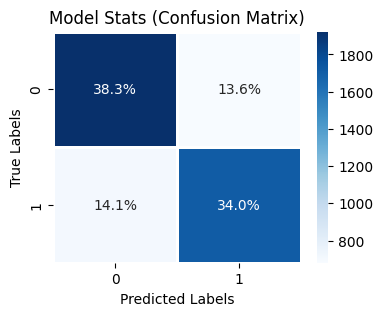

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', linewidth=1., cmap='Blues', 
                 xticklabels=model.classes_, yticklabels=model.classes_)
total = 0
for t in ax.texts: total += float(t.get_text())
for t in ax.texts: t.set_text(f"{round(100 * float(t.get_text())/total, 1)}%")
plt.title(f'Model Stats (Confusion Matrix)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()